# Test treatment effects under placebo

The set up for the following tests is to test the regression estimator for the treatment effect in the case that the treatment effect is 0, but the treatment is related to the risk factor affecting the outcome.

## Example C.

Simplest possible example.  One continuous risk factor $X$, one continuous treatment $T$, one binary outcome $Y$.
Treatment is correlated to risk factor.
   
We generate N=100 patients per treatment arm, then estimate the treatment effect.  This is repeated n_iter = 1000 times for the bootstrap 95% confidence interval.

In [1]:
from treatment_effect_under_placebo_simulations import scenario_C
cis, _ = scenario_C(N = 100,
                    n_iter = 1000,
                    covariance = 1.,
                    distribution_type = 'uniform',
                    method = 'regression')
print('Treatment Effect CI: ({:.2f},  {:.2f})'.format(cis[0],cis[1]))

Treatment Effect CI: (-0.07,  0.09)


In [2]:
# Run all methods
import numpy as np
methods = ['regression', 'matchdist']
ncovariances = 100
covariances = np.logspace(-2,2,ncovariances)
cis_ = {}
for method in methods:    
    cis = np.zeros((ncovariances,2))
    for i, covariance in enumerate(covariances):        
        cis[i,:], num_valid = scenario_C(N = 100,
                                         n_iter = 1000,
                                         covariance = covariance,
                                         distribution_type = 'uniform',
                                         method = method)        
        # print('Method {}, Location {}, TE CI: ({:.2f},  {:.2f}); {} valid runs.'.format(method,loc,cis[0],cis[1],num_valid))
    cis_[method] = cis

In [3]:
# Save to CSV
import pandas as pd
for method in methods:
    df = pd.DataFrame(np.hstack([np.reshape(covariances,(len(covariances),1)),cis_[method]]),
                      columns=['location','CI_lower','CI_upper'])
    fname = r'C:\Users\jb2428\Desktop\python\cer\PlaceboSimulations\csv_placebo_scenario_C_uniform_{}.csv'.format(method)
    df.to_csv(fname, index=False)

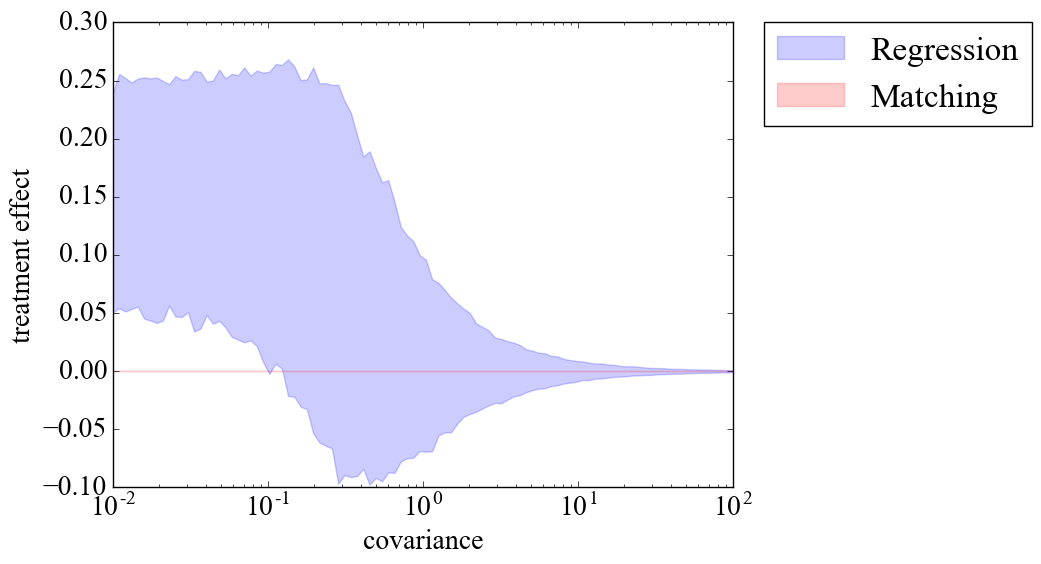

In [4]:
# Plot the CIs
%matplotlib inline
import matplotlib
matplotlib.rc('font', **{'family':'Times New Roman', 'weight':'normal', 'size':20})
import matplotlib.pyplot as plt

fig = plt.figure()    
fig.set_size_inches(8,6)  
ax = fig.add_subplot(111) 
plt.fill_between(covariances,cis_['regression'][:,0],cis_['regression'][:,1],alpha=0.2,color='blue',label='Regression')
plt.fill_between(covariances,cis_['matchdist'][:,0],cis_['matchdist'][:,1],alpha=0.2,color='red',label='Matching')
plt.xscale('log')
plt.xlabel('covariance')
plt.ylabel('treatment effect')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc=2, borderaxespad=0., numpoints=3)
fname = r'C:\Users\jb2428\Desktop\python\cer\PlaceboSimulations\plt_placebo_scenario_C_uniform.png' 
plt.savefig(fname,format='png',dpi=600,bbox_inches='tight') 